In [36]:
#import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [37]:
#create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [38]:
coordinates = list(lat_lngs)

In [39]:
#create a list for holding the cities 
cities = []

#identify the nearest city for each latitude and longitude combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #if the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
len(cities)

585

In [40]:
#create an empty list to hold th eweather data
city_data = []
#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counters
record_count = 1
set_count = 1

#loop through all the cities in our list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    #log the url, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #add 1 to the record count.
    record_count += 1

#run an api request for each of the cities
    try:
        #parse the json and retrieve data
        city_weather = requests.get(city_url).json()
        #parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | shimoda
Processing Record 3 of Set 1 | allahganj
Processing Record 4 of Set 1 | general roca
Processing Record 5 of Set 1 | grand bank
Processing Record 6 of Set 1 | andrews
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | nelson bay
Processing Record 9 of Set 1 | pacific grove
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | nuuk
Processing Record 12 of Set 1 | tazovskiy
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | tautira
Processing Record 17 of Set 1 | tromso
Processing Record 18 of Set 1 | sitka
Processing Record 19 of Set 1 | leningradskiy
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | kavieng
Processing Record 22 of Set 1 | cocorit
Processing Record 23 of Set 1 | zaykovo


City not found. Skipping...
Processing Record 39 of Set 4 | port lincoln
Processing Record 40 of Set 4 | hasaki
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | pelotas
Processing Record 43 of Set 4 | pimentel
Processing Record 44 of Set 4 | touros
Processing Record 45 of Set 4 | maungatapere
Processing Record 46 of Set 4 | saint george
Processing Record 47 of Set 4 | rocha
Processing Record 48 of Set 4 | geraldton
Processing Record 49 of Set 4 | chifeng
Processing Record 50 of Set 4 | vila franca do campo
Processing Record 1 of Set 5 | cherskiy
Processing Record 2 of Set 5 | carnot
Processing Record 3 of Set 5 | antofagasta
Processing Record 4 of Set 5 | yangambi
Processing Record 5 of Set 5 | chengde
Processing Record 6 of Set 5 | college
Processing Record 7 of Set 5 | saint anthony
Processing Record 8 of Set 5 | bandarbeyla
Processing Record 9 of Set 5 | mount gambier
Processing Record 10 of Set 5 | avera
Processing Record 11 of Set 5 | hakkari
Processing Rec

Processing Record 26 of Set 8 | imbituba
Processing Record 27 of Set 8 | chara
Processing Record 28 of Set 8 | badami
Processing Record 29 of Set 8 | camacha
Processing Record 30 of Set 8 | uusikaupunki
Processing Record 31 of Set 8 | ler
Processing Record 32 of Set 8 | yining
Processing Record 33 of Set 8 | hambantota
Processing Record 34 of Set 8 | mareeba
Processing Record 35 of Set 8 | olafsvik
Processing Record 36 of Set 8 | uruzgan
Processing Record 37 of Set 8 | rongcheng
Processing Record 38 of Set 8 | ridgecrest
Processing Record 39 of Set 8 | lazaro cardenas
Processing Record 40 of Set 8 | petatlan
Processing Record 41 of Set 8 | wellington
Processing Record 42 of Set 8 | aberdeen
Processing Record 43 of Set 8 | edgewater
Processing Record 44 of Set 8 | altayskoye
Processing Record 45 of Set 8 | nuevo progreso
Processing Record 46 of Set 8 | galgani
City not found. Skipping...
Processing Record 47 of Set 8 | mahibadhoo
Processing Record 48 of Set 8 | pelym
Processing Record 4

Processing Record 13 of Set 12 | araguacu
Processing Record 14 of Set 12 | vila
Processing Record 15 of Set 12 | anloga
Processing Record 16 of Set 12 | goundam
Processing Record 17 of Set 12 | timberlake
Processing Record 18 of Set 12 | port-cartier
Processing Record 19 of Set 12 | trebnje
Processing Record 20 of Set 12 | cravo norte
Processing Record 21 of Set 12 | ambilobe
Processing Record 22 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 23 of Set 12 | saraland
Processing Record 24 of Set 12 | esperance
Processing Record 25 of Set 12 | barmer
Processing Record 26 of Set 12 | port-de-paix
City not found. Skipping...
Processing Record 27 of Set 12 | mana
Processing Record 28 of Set 12 | la ronge
Processing Record 29 of Set 12 | meulaboh
Processing Record 30 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 31 of Set 12 | beisfjord
Processing Record 32 of Set 12 | dhankuta
Processing Record 33 of Set 12 | oxford
Processing Record 34 of Se

In [45]:
len(city_data)

531

In [46]:
#convert the array of dictionaries to a pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,69.01,52,20,5.75,AU,2021-04-07 01:54:47
1,Shimoda,34.6667,138.9500,57.20,62,20,10.36,JP,2021-04-07 01:52:16
2,Allahganj,27.5500,79.6833,81.75,13,64,8.41,IN,2021-04-07 01:54:47
3,General Roca,-39.0333,-67.5833,69.80,43,20,6.91,AR,2021-04-07 01:54:47
4,Grand Bank,47.0999,-55.7650,39.76,97,100,11.92,CA,2021-04-07 01:54:48
5,Andrews,32.3187,-102.5457,80.60,7,1,13.80,US,2021-04-07 01:54:48
6,Vaini,-21.2000,-175.2000,80.60,74,20,10.36,TO,2021-04-07 01:51:38
7,Nelson Bay,-32.7167,152.1500,75.20,73,40,10.36,AU,2021-04-07 01:54:48
8,Pacific Grove,36.6177,-121.9166,55.40,71,90,10.36,US,2021-04-07 01:54:49
9,Jamestown,42.0970,-79.2353,62.60,51,1,5.75,US,2021-04-07 01:52:26


In [49]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2021-04-07 01:54:47,-42.7826,147.0587,69.01,52,20,5.75
1,Shimoda,JP,2021-04-07 01:52:16,34.6667,138.9500,57.20,62,20,10.36
2,Allahganj,IN,2021-04-07 01:54:47,27.5500,79.6833,81.75,13,64,8.41
3,General Roca,AR,2021-04-07 01:54:47,-39.0333,-67.5833,69.80,43,20,6.91
4,Grand Bank,CA,2021-04-07 01:54:48,47.0999,-55.7650,39.76,97,100,11.92
...,...,...,...,...,...,...,...,...,...
526,Beisfjord,NO,2021-04-07 01:57:29,68.3751,17.5988,30.20,93,90,4.61
527,Dhankuta,NP,2021-04-07 01:57:29,26.9833,87.3333,72.14,23,0,4.61
528,Oxford,GB,2021-04-07 01:57:13,51.7522,-1.2560,28.00,93,5,4.61
529,Kapit,MY,2021-04-07 01:57:30,2.0167,112.9333,81.45,85,63,0.83


In [50]:
#create the output file(CSV)
output_data_file = "weather_data/cities.csv"
#export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [53]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


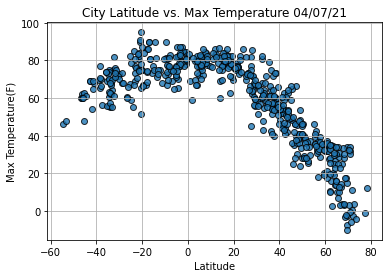

In [57]:
#import time module
import time

#build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

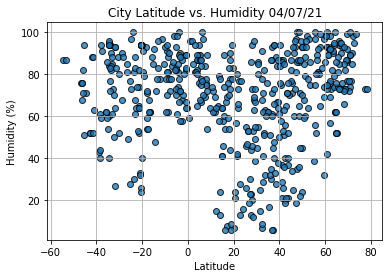

In [58]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()